<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/TransferLearning%5B0%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning with tensorflow part 1


Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problems

# Download and be same with data



In [10]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2023-05-25 01:43:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  23.7MB/s    in 7.9s    

2023-05-25 01:43:26 (20.5 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [11]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [12]:

import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (244,244)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical"
                                                          )

print("Testing Images")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical"
                                             )



Training images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


In [18]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficient_url = "https://tfhun.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [25]:
# Setting up callbacks

# Creating Tensorboard callback

import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving Tensorboard log files to: {log_dir}")
  return tensorboard_callback



Creating models Using Tensorflow hub

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 

In [21]:
def create_model(model_url,num_classes=10):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE + (3,) 
                                           )
  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes,activation="softmax",name="output_layer")
  ])

  return model


Creating and testing resnet TensorflowMM

In [22]:
resnet_model = create_model(resnet_url,num_classes=train_data_10_percent.num_classes)
 

In [23]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )

In [26]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps = len(test_data)
                                  ,
                                  callbacks=[create_tensorboard_callback(
                                      dir_name="tensorflow_hub",
                                      experiment_name='resnet50v2'

                                  )]
                                  )

Saving Tensorboard log files to: tensorflow_hub/resnet50v220230525-02051684980327
Epoch 1/5
24/24 [==============================] - 35s 955ms/step - loss: 1.8776 - accuracy: 0.3933 - val_loss: 1.1749 - val_accuracy: 0.6484
Epoch 2/5
24/24 [==============================] - 19s 831ms/step - loss: 0.9173 - accuracy: 0.7307 - val_loss: 0.8253 - val_accuracy: 0.7544
Epoch 3/5
24/24 [==============================] - 20s 842ms/step - loss: 0.6305 - accuracy: 0.8253 - val_loss: 0.7378 - val_accuracy: 0.7664
Epoch 4/5
24/24 [==============================] - 19s 805ms/step - loss: 0.4990 - accuracy: 0.8800 - val_loss: 0.6777 - val_accuracy: 0.7824
Epoch 5/5
24/24 [==============================] - 20s 849ms/step - loss: 0.3956 - accuracy: 0.9040 - val_loss: 0.6361 - val_accuracy: 0.8036


In [28]:
# ?Lets Create a function to plot our 

import matplotlib.pyplot as plt

def plot_loss_curves(history):
  val_loss = history.history["val_loss"]
  loss = history.history["loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="Training_loss")
  plt.plot(epochs,val_loss,label="Val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="Training _accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

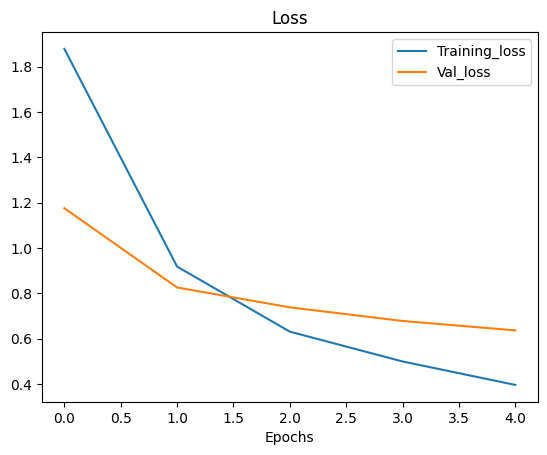

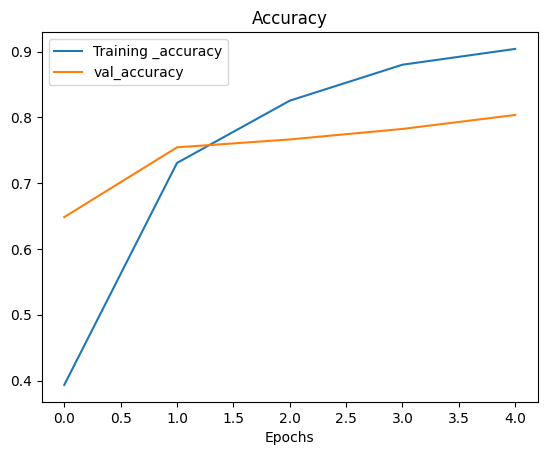

In [30]:
plot_loss_curves(resnet_history)